<a href="https://colab.research.google.com/github/Arnold-18-CS/Market-Analysis-Study/blob/main/clustering_comparisons.py" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Loading the dataset

## Feature Selection for Clustering

We select a subset of demographic and economic features that are relevant for clustering. These features capture key aspects of respondents' backgrounds and financial situations that may influence their market behavior and financial stress patterns.


In [16]:
# Load the cleaned dataset
df = pd.read_csv("data_cleaned.csv")
df

,Serial_No,Period,Period.Year,Period.Quarter,Period.Month,Period.Day,Job_Market_Difficulty,Good_Time_For_Large_Purchase,Future_Spend_On_Large_Purchases,Able_To_Meet_Regular_Expenses,...,Dealing_With_Rising_Prices,Borrowed_Money_For_Rising_Prices,Reason_For_Price_Increase,Stress_Level,Combat_Price_Increase,Curb_Inflation_Methods,Eating_Habits_Change,Meat_Milk_Habits_Change,Alcohol_Types_Drunk,Alcohol_Category_Most_Drunk
0,R3229,2022-06-20,2022,2,6,20,Difficult,Yes,Same,No,...,Delayed non-essential purchases,"No, have not borrowed",Impact of COVID-19 pandemic,Quite stressful,Governments should support the local productio...,"I stopped specific diets e.g Keto, Vegan, Glut...",NaN,NaN,NaN,NaN
1,R3377,2022-06-20,2022,2,6,20,Difficult,Yes,More,Maybe,...,"Other changes in purchasing habits (e.g., buyi...","Yes, had to borrow a few times",Impact of Russia's invasion of Ukraine,Quite stressful,People should save more,I am going to bars less often;I am purchasing ...,NaN,NaN,NaN,NaN
2,R2149,2022-11-20,2022,4,11,20,Difficult,No,Less,Yes,...,Searched for sales and promotions;Purchased ch...,"Yes, had to borrow a few times",Impact of Russia's invasion of Ukraine,Quite stressful,People should spend less;People should save more,I am purchasing less produce;I am purchasing l...,NaN,NaN,NaN,NaN
3,R3410,2022-06-20,2022,2,6,20,Difficult,Maybe,More,Maybe,...,Searched for sales and promotions;Purchased ch...,"Yes, had to borrow often",Impact of Russia's invasion of Ukraine,Quite stressful,Governments should support the local productio...,I am eating out at restaurants less often;I am...,NaN,NaN,NaN,NaN
4,R2099,2022-11-20,2022,4,11,20,Difficult,No,Less,Maybe,...,"Other changes in purchasing habits (e.g., buyi...","Yes, had to borrow a few times",Impact of COVID-19 pandemic,Quite stressful,Governments should support the local productio...,I am stocking up on cheap street/local market ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,R269,2024-12-20,2024,4,12,20,Same,Maybe,Less,Yes,...,"Purchased cheaper alternatives, brands or item...","No, have not borrowed",Impact of Russia's invasion of Ukraine,Neutral,Governments should support the local productio...,I am purchasing less alcohol;I am stocking up ...,I am now eating less expensive types of meals ...,I am no longer eating meat at all;I am now usi...,Champagne/sparkling wine;RTD's (fruit flavoure...,Wine
3930,R128,2024-12-20,2024,4,12,20,Difficult,No,More,Yes,...,Delayed non-essential purchases;Other changes ...,"Yes, had to borrow a few times",Increase in government taxes on food and fuel,Neutral,Governments should support the local productio...,I am purchasing less alcohol;I am spending les...,I am now eating less expensive brands;I am now...,I am now eating less expensive types of meat,Wine,Wine
3931,R66,2024-12-20,2024,4,12,20,Same,Maybe,More,Maybe,...,Delayed non-essential purchases;Other changes ...,"Yes, had to borrow a few times",Increase in government taxes on food and fuel,Quite stressful,Governments should support the local productio...,I am purchasing less prepackaged or frozen foo...,I am now eating less meals per day (e.g. skipp...,I am now eating smaller quantity of meat than ...,Wine,Wine
3932,R64,2024-12-20,2024,4,12,20,Difficult,No,Same,Maybe,...,Searched for sales and promotions;Used communi...,"Yes, had to borrow often",Currency fluctuations,Quite stressful,Governments should support the local productio...,I am spending less on beauty products and proc...,I am now eating less food (smaller portions);I...,I am now using milk less frequently/fewer time...,Brandy;Wine,Wine


## Label Encoding of Categorical Features

Clustering algorithms require numerical input. We use label encoding to convert categorical variables into numeric codes. This step is essential for algorithms like KMeans and Agglomerative Clustering to process the data.


In [17]:
# Select relevant features for clustering
selected_features = [
    'Age_Group', 'Gender', 'Marital_Status', 'Highest_Education_Level',
    'Occupation', 'Household_Size', 'Children_Under_18',
    'Total_Household_Income', 'Income_Level', 'Able_To_Meet_Regular_Expenses',
    'Earning_Difficulty', 'Borrowed_Money_For_Rising_Prices'
]

# Subset the dataset
df_selected = df[selected_features]


The label-encoded data is saved to 'label_encoded_demographic_data.csv' for use in clustering algorithms. Each categorical value is now represented as a numerical code that can be processed by machine learning algorithms.


## Clustering Evaluation Metrics

To assess the quality of the clustering, we compute the Silhouette Score and Davies-Bouldin Index on a sample of the data. These metrics help us understand how well the clusters are separated and how compact they are.


In [18]:

# Create a copy to store the label encoded version
label_encoded_df = df_selected.copy()

# Dictionary to store LabelEncoders for each column (useful for decoding later)
label_encoders = {}

# Apply Label Encoding to all selected columns
for column in label_encoded_df.columns:
    le = LabelEncoder()
    # Convert all values to string before encoding to handle mixed types or missing values
    label_encoded_df[column] = le.fit_transform(label_encoded_df[column].astype(str))
    label_encoders[column] = le  # Save the encoder

# Save the label-encoded DataFrame to a new CSV file
label_encoded_df.to_csv("label_encoded_demographic_data.csv", index=False)

print("Label encoded data saved as 'label_encoded_demographic_data.csv'")

Label encoded data saved as 'label_encoded_demographic_data.csv'


## KMeans Clustering

We apply KMeans clustering to the label-encoded data to identify groups of respondents with similar demographic and financial characteristics. The number of clusters is set to 4 based on domain knowledge and previous exploratory analysis.


In [19]:
#K-MEANS
# Load label-encoded dataset
df = pd.read_csv("label_encoded_demographic_data.csv")

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df)

# Add cluster labels to data
df['Cluster'] = labels

### Interpreting the Results

- **Silhouette Score**: Ranges from -1 to 1. Higher values indicate better-defined clusters
- **Davies-Bouldin Index**: Lower values indicate more distinct and compact clusters

The negative Silhouette Score and high Davies-Bouldin Index suggest that the clusters may be overlapping or not well-separated, which is common with high-dimensional demographic data.


## PCA Visualization of Clusters

We use Principal Component Analysis (PCA) to reduce the dimensionality of the data to two components for visualization. This allows us to plot the clusters in 2D space and visually inspect their separation and distribution.


In [20]:
# Evaluate clustering with metrics on sample
sample_df, _ = train_test_split(df.drop(columns='Cluster'), train_size=1000, random_state=42)
sample_labels = labels[:1000]  # First 1000 labels

silhouette = silhouette_score(sample_df, sample_labels)
db_index = davies_bouldin_score(sample_df, sample_labels)

print(f"\n Silhouette Score (sampled): {silhouette:.3f}")
print(f" Davies-Bouldin Index (sampled): {db_index:.3f}")



 Silhouette Score (sampled): -0.010
 Davies-Bouldin Index (sampled): 29.737


## Numeric Cluster Summary

We compute the mean of each feature within each cluster to summarize the typical characteristics of each group. This provides a quantitative overview of how clusters differ across the various demographic and financial variables.


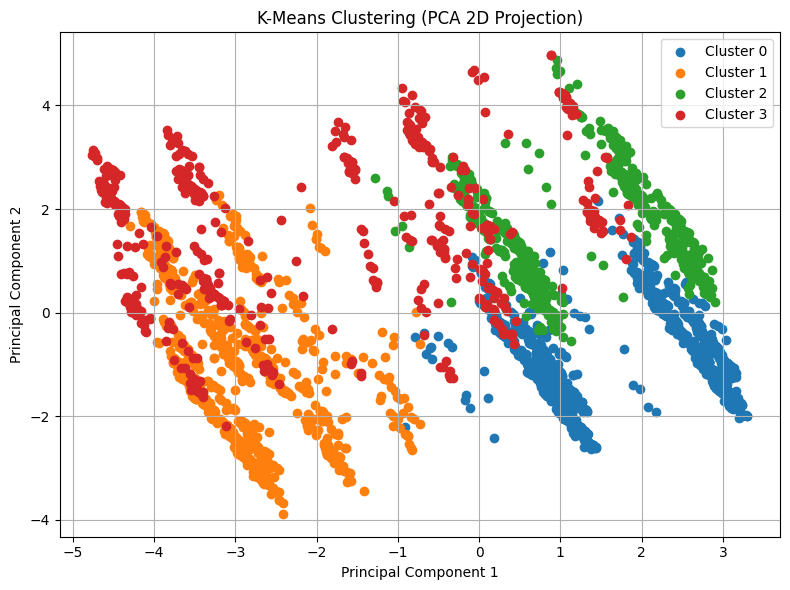

In [21]:
# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop(columns='Cluster'))
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
for c in sorted(df_pca['Cluster'].unique()):
    cluster_points = df_pca[df_pca['Cluster'] == c]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {c}')
plt.title("K-Means Clustering (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The resulting CSV file ('cluster_representation_summary.csv') provides a numeric overview of each cluster, which can be useful for statistical analysis or further modeling. However, since these are means of encoded categorical variables, they can be difficult to interpret directly.


## Descriptive Cluster Summary (Mode-based)

To provide a more interpretable summary, we decode the label-encoded features back to their original categorical values and compute the most common (mode) value for each feature within each cluster. This gives us human-readable profiles for each group.


In [22]:
# Group by cluster and calculate the mean of each feature
cluster_summary = df.groupby('Cluster').mean().round(2)

# Display the summary
print(" Cluster Representation Summary:")
print(cluster_summary)

# Optional: Save the summary to a CSV file
cluster_summary.to_csv("cluster_representation_summary.csv")
print("\n Summary saved as 'cluster_representation_summary.csv'")

 Cluster Representation Summary:
         Age_Group  Gender  Marital_Status  Highest_Education_Level  \
Cluster                                                               
0             2.28    0.54            2.47                     4.96   
1             2.24    0.47            2.41                     0.38   
2             2.33    0.51            2.53                     5.03   
3             1.92    0.44            2.80                     2.25   

         Occupation  Household_Size  Children_Under_18  \
Cluster                                                  
0              1.08            0.35               0.89   
1              1.03            1.47               0.70   
2              1.17            3.30               0.44   
3              4.61            1.86               0.44   

         Total_Household_Income  Income_Level  Able_To_Meet_Regular_Expenses  \
Cluster                                                                        
0                          1.74

### Cluster Insights

The descriptive summary reveals distinct demographic and financial profiles:

- **Cluster 0**: University-educated, married males with middle income
- **Cluster 1**: Diploma-educated, married females with low income  
- **Cluster 2**: Vocationally-trained, married males with smaller households
- **Cluster 3**: Young, single, unemployed females (Gen Z)

The descriptive summary is saved to 'descriptive_cluster_summary.csv' for easy interpretation and reporting. This analysis can help identify target segments for market research or policy interventions.


In [23]:
# Descriptive Summary of Each Cluster
# Load original data
raw_df = pd.read_csv("data_cleaned.csv")

# Features used for clustering
features = [
    'Age_Group', 'Gender', 'Marital_Status', 'Highest_Education_Level',
    'Occupation', 'Household_Size', 'Children_Under_18',
    'Total_Household_Income', 'Income_Level',
    'Able_To_Meet_Regular_Expenses', 'Earning_Difficulty',
    'Borrowed_Money_For_Rising_Prices'
]

# Re-create label encoders to decode values
label_encoders = {}
for col in features:
    le = LabelEncoder().fit(raw_df[col].astype(str))
    label_encoders[col] = le

# Decode the label-encoded DataFrame
decoded_df = df.copy()
for col in features:
    decoded_df[col] = label_encoders[col].inverse_transform(df[col])

# Compute mode (most common) value in each cluster
summary = (
    decoded_df
    .groupby('Cluster')[features]
    .agg(lambda x: x.value_counts().index[0])
    .reset_index()
)

# Display and save descriptive summary
print("\n Descriptive Cluster Summary:")
print(summary.to_string(index=False))

# Show cluster sizes
cluster_sizes = decoded_df['Cluster'].value_counts().sort_index()
print("\n Observations per cluster:")
print(cluster_sizes)

# Save summary to CSV
summary.to_csv("descriptive_cluster_summary.csv", index=False)
print("\n Descriptive summary saved as 'descriptive_cluster_summary.csv'")


 Descriptive Cluster Summary:
 Cluster   Age_Group Gender Marital_Status Highest_Education_Level        Occupation Household_Size Children_Under_18    Total_Household_Income  Income_Level Able_To_Meet_Regular_Expenses Earning_Difficulty Borrowed_Money_For_Rising_Prices
       0 Millennials   Male        Married       University degree Salaried employee  3 or 4 people               Yes Between USD501 and USD900 Middle Income                           Yes          Difficult   Yes, had to borrow a few times
       1 Millennials Female        Married                 Diploma Salaried employee  3 or 4 people               Yes              Under USD500    Low Income                         Maybe          Difficult   Yes, had to borrow a few times
       2 Millennials   Male        Married     Vocational training Salaried employee Up to 2 people                No              Under USD500 Middle Income                         Maybe          Difficult   Yes, had to borrow a few times
       3 

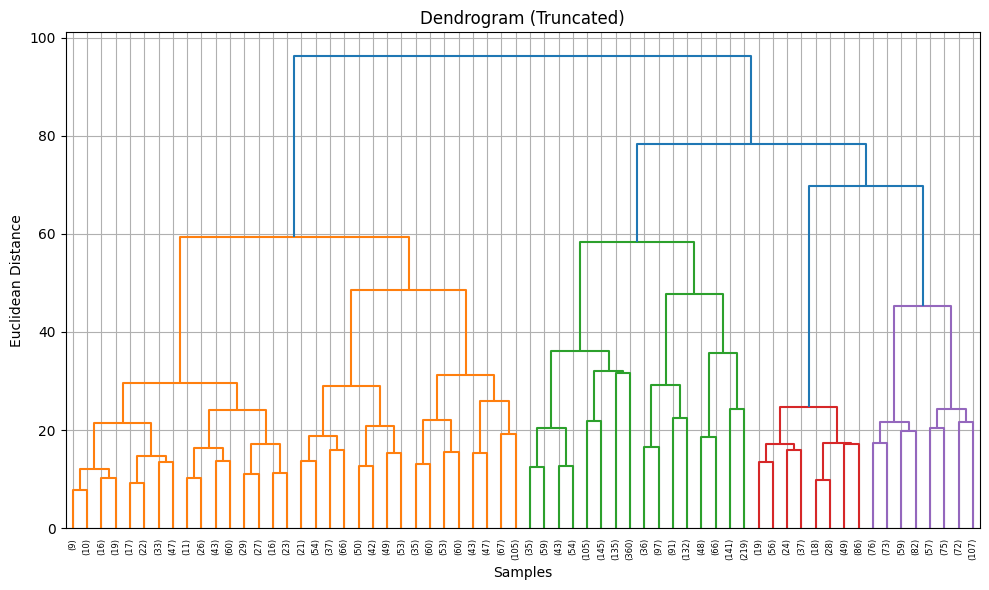


 Silhouette Score (sampled): -0.016
 Davies-Bouldin Index (sampled): 23.598


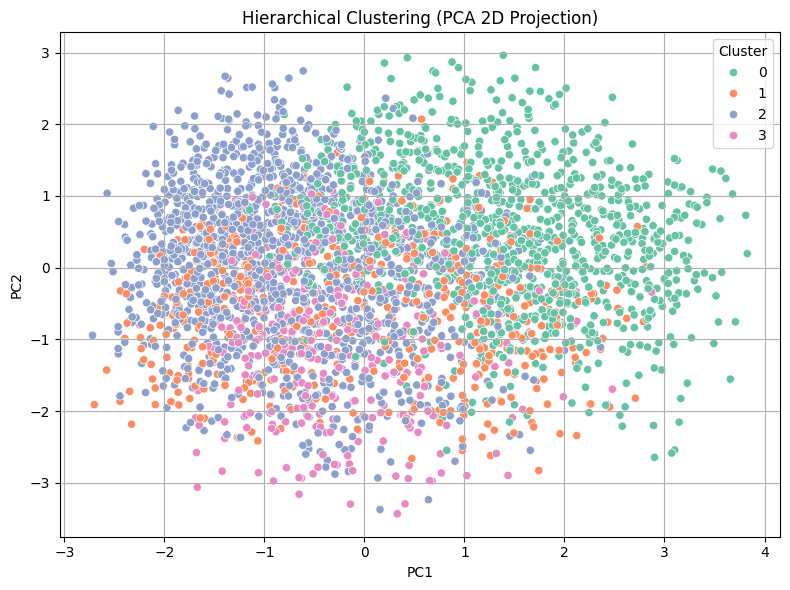

In [24]:
#Hierarchical
# 1. Load label-encoded data
# -----------------------
df = pd.read_csv("label_encoded_demographic_data.csv")

# Optional: scale features (can improve clustering)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# -----------------------
# 2. Create dendrogram (for visualization only)
# -----------------------
plt.figure(figsize=(10, 6))
linked = linkage(scaled_df, method='ward')
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (Truncated)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# 3. Fit Agglomerative Clustering
# -----------------------
hier_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels = hier_cluster.fit_predict(scaled_df)
df['Cluster'] = labels

# -----------------------
# 4. Evaluate clustering
# -----------------------
sample_df, _ = train_test_split(scaled_df, train_size=1000, random_state=42)
sample_labels = labels[:1000]

silhouette = silhouette_score(sample_df, sample_labels)
db_index = davies_bouldin_score(sample_df, sample_labels)

print(f"\n Silhouette Score (sampled): {silhouette:.3f}")
print(f" Davies-Bouldin Index (sampled): {db_index:.3f}")

# -----------------------
# 5. PCA for visualizing clusters
# -----------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Hierarchical Clustering (PCA 2D Projection)")
plt.grid(True)
plt.tight_layout()
plt.show()


 Silhouette Score (sampled): -0.016
 Davies-Bouldin Index (sampled): 30.314


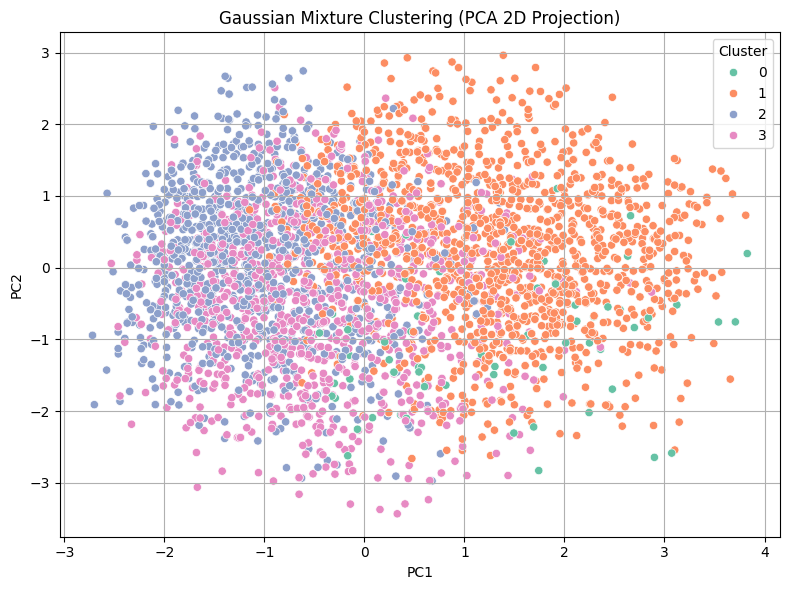

In [25]:
# GMM
# 1. Load label-encoded data
# -----------------------
df = pd.read_csv("label_encoded_demographic_data.csv")

# Scale the data for GMM (important!)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# -----------------------
# 2. Fit Gaussian Mixture Model
# -----------------------
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
labels = gmm.fit_predict(scaled_df)

# Add cluster labels to original df
df['Cluster'] = labels

# -----------------------
# 3. Evaluate clustering
# -----------------------
sample_df, _ = train_test_split(scaled_df, train_size=1000, random_state=42)
sample_labels = labels[:1000]

silhouette = silhouette_score(sample_df, sample_labels)
db_index = davies_bouldin_score(sample_df, sample_labels)

print(f"\n Silhouette Score (sampled): {silhouette:.3f}")
print(f" Davies-Bouldin Index (sampled): {db_index:.3f}")

# -----------------------
# 4. PCA for 2D Visualization
# -----------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Gaussian Mixture Clustering (PCA 2D Projection)")
plt.grid(True)
plt.tight_layout()
plt.show()